In [3]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import college_admissions_experiments as script
import ipdb
import pdb
import pandas as pd
import tqdm.notebook as tqdm
from multiprocessing import Pool
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
args = script.get_args(
    '--n-cores 1 --num-repeat 1 --num-applicants 100000 --applicants-per-round 1000 --fixed-effort-conversion --scaled-duplicates sequence --b-bias 2 --num-envs 2 --pref uniform --experiment-root protocol-exps --test-run --generate 1 --stream --no-protocol'
)
np.random.seed(0)
b, x, y, EW, theta, w, z, y_hat, adv_idx, disadv_idx, o, theta_star, pref_vect  = script.generate_data(
    args.num_applicants, args.admit_all, args.applicants_per_round, args.fixed_effort_conversion, args
            )
theta_star[0]

array([0.        , 0.85281047])

In [3]:
# for i in range(args.num_envs):
    # print(f'env {i+1}')
    # theta_env = theta[i, :,]
    # for j in range(0, args.num_applicants, args.applicants_per_round*2):
        # idx = j
        # idx2 = j + args.applicants_per_round
        # print(theta_env[idx])
        # print(theta_env[idx2])
        # print(theta_env[idx2] / theta_env[idx])
        # print()

In [4]:
from scipy.stats import ttest_ind
condition = 'w'
def test(vect, args, condition, show_first_env=True, plot=False):
    assert vect.shape == (args.num_applicants,)
    assert z.shape == (args.num_applicants, )
    assert condition in ('z', 'w')
    out1, out2 = [], []
    for env_idx in range(args.num_envs if not show_first_env else 1):
        for i in range(0, args.num_applicants, args.applicants_per_round*2):

            low1, up1 = i, i+args.applicants_per_round
            low2, up2 = up1, up1+args.applicants_per_round
            w_t1 = w[env_idx][low1:up1]
            w_t2 = w[env_idx][low2:up2]
    
            z_t1 = z[low1:up1]
            z_t2 = z[low2:up2]

            vect_t1 = vect[low1:up1]
            vect_t2 = vect[low2:up2]
            if condition == 'w':
                c1 = w_t1 == 1
                c2 = w_t2 == 1
            elif condition == 'z':
                c1 = z_t1 == env_idx+1
                c2 = z_t2 == env_idx+1
            data1 = vect_t1[c1]
            data1mean = data1.mean()
            data2 = vect_t2[c2]
            data2mean = data2.mean()

            if show_first_env and plot:
                _,ax=plt.subplots(ncols=1 if show_first_env else 2,nrows=2, sharex=True, sharey=True)
                ax[0].hist(data1, bins='auto')
                ax[0].axvline(x=data1mean, color='k')
                ax[0].set_title(f'env {env_idx}, round t')
                ax[1].hist(data2, bins='auto' )
                ax[1].axvline(x=data2mean, color='k')
                ax[1].set_title(f'env {env_idx}, round t+1')
    
            m1, m2 = data1.mean(), data2.mean()
            _, pval = ttest_ind(data1, data2, axis=0, equal_var=False, nan_policy='raise')
            print(f'm1 = {m1:.2f}, m2 = {m2:.2f}, pval = {pval}')
            out1.append(m1-m2)
            out2.append(pval)
    return np.array(out1), np.array(out2)

n_rounds = args.num_applicants / args.applicants_per_round
# meandiffs, pvals = test(b.dot(theta_star[0]), args, condition='w', plot=False)
# fig,ax=plt.subplots(ncols=2)
# ax[0].hist(meandiffs, bins=50)
# out, _, _ = ax[1].hist(pvals, bins=50 )

m1 = 2.58, m2 = 2.51, pval = 0.3366284176411112
m1 = 2.34, m2 = 2.50, pval = 0.017747662188821286
m1 = 2.56, m2 = 2.67, pval = 0.08875771869792436
m1 = 2.82, m2 = 2.69, pval = 0.021545296916617558
m1 = 2.65, m2 = 2.75, pval = 0.09538543917523863
m1 = 2.42, m2 = 2.67, pval = 0.00022677036984505215
m1 = 2.66, m2 = 2.77, pval = 0.06829200073109064
m1 = 2.73, m2 = 2.70, pval = 0.6581862003122383
m1 = 2.57, m2 = 2.68, pval = 0.08569324883098882
m1 = 1.64, m2 = 1.75, pval = 0.02306759170042236
m1 = 2.68, m2 = 2.74, pval = 0.21008539602185305
m1 = 2.69, m2 = 2.74, pval = 0.39233163802024384
m1 = 1.82, m2 = 1.81, pval = 0.8471033568199883
m1 = 2.68, m2 = 2.82, pval = 0.011772422700773149
m1 = 2.64, m2 = 2.67, pval = 0.5039320171146089
m1 = 1.92, m2 = 1.82, pval = 0.07882875363326783
m1 = 2.78, m2 = 2.72, pval = 0.3764430883781634
m1 = 2.70, m2 = 2.65, pval = 0.3541542534371025
m1 = 2.65, m2 = 2.65, pval = 0.9891106312528141
m1 = 2.52, m2 = 2.70, pval = 0.0018457387526994642
m1 = 2.03, m2 = 2.0

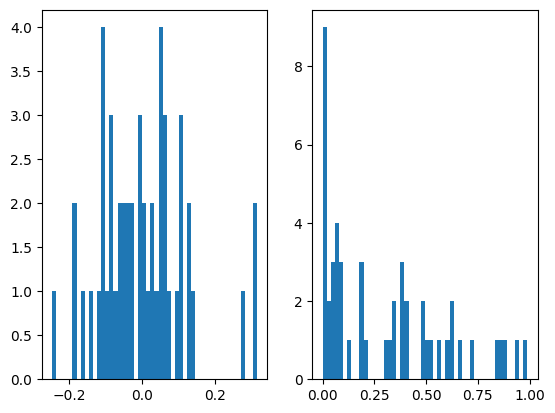

In [5]:
meandiffs, pvals = test(b.dot(theta_star[0]), args, condition='z', plot=False)
fig,ax=plt.subplots(ncols=2)
n_rounds = args.num_applicants / args.applicants_per_round
n_rounds = int(n_rounds/2)
ax[0].hist(meandiffs, bins=n_rounds)
out, _, _ = ax[1].hist(pvals, bins=n_rounds)

m1 = 0.19, m2 = 0.15, pval = 0.31233424850710884
m1 = 0.05, m2 = 0.13, pval = 0.03559139628357498
m1 = 0.13, m2 = 0.21, pval = 0.08256545524041514
m1 = 0.25, m2 = 0.19, pval = 0.061319779789818
m1 = 0.15, m2 = 0.21, pval = 0.14540397022846707
m1 = 0.08, m2 = 0.21, pval = 0.001523931763953154
m1 = 0.20, m2 = 0.26, pval = 0.06327799067036007
m1 = 0.22, m2 = 0.24, pval = 0.5892034961537007
m1 = 0.14, m2 = 0.21, pval = 0.07231913779634287
m1 = -0.37, m2 = -0.31, pval = 0.07088581650982335
m1 = 0.22, m2 = 0.25, pval = 0.40060480589921055
m1 = 0.20, m2 = 0.22, pval = 0.6182320964230446
m1 = -0.26, m2 = -0.24, pval = 0.6092353642918915
m1 = 0.18, m2 = 0.22, pval = 0.2861333850361644
m1 = 0.15, m2 = 0.22, pval = 0.10047905910683169
m1 = -0.17, m2 = -0.21, pval = 0.2717662998775966
m1 = 0.21, m2 = 0.19, pval = 0.6069090966085805
m1 = 0.21, m2 = 0.15, pval = 0.14034991783223597
m1 = 0.20, m2 = 0.19, pval = 0.8544338249926862
m1 = 0.13, m2 = 0.22, pval = 0.03025660501877179
m1 = -0.14, m2 = -0.06

(array([5., 2., 2., 5., 3., 2., 0., 3., 0., 1., 0., 0., 1., 1., 1., 2., 0.,
        0., 0., 0., 2., 1., 0., 0., 0., 1., 1., 2., 1., 1., 2., 2., 0., 0.,
        0., 2., 1., 0., 1., 0., 1., 0., 2., 0., 1., 0., 0., 0., 0., 1.]),
 array([1.10655041e-04, 1.99823319e-02, 3.98540088e-02, 5.97256857e-02,
        7.95973626e-02, 9.94690395e-02, 1.19340716e-01, 1.39212393e-01,
        1.59084070e-01, 1.78955747e-01, 1.98827424e-01, 2.18699101e-01,
        2.38570778e-01, 2.58442455e-01, 2.78314132e-01, 2.98185809e-01,
        3.18057485e-01, 3.37929162e-01, 3.57800839e-01, 3.77672516e-01,
        3.97544193e-01, 4.17415870e-01, 4.37287547e-01, 4.57159224e-01,
        4.77030901e-01, 4.96902578e-01, 5.16774254e-01, 5.36645931e-01,
        5.56517608e-01, 5.76389285e-01, 5.96260962e-01, 6.16132639e-01,
        6.36004316e-01, 6.55875993e-01, 6.75747670e-01, 6.95619347e-01,
        7.15491023e-01, 7.35362700e-01, 7.55234377e-01, 7.75106054e-01,
        7.94977731e-01, 8.14849408e-01, 8.34721085e-01

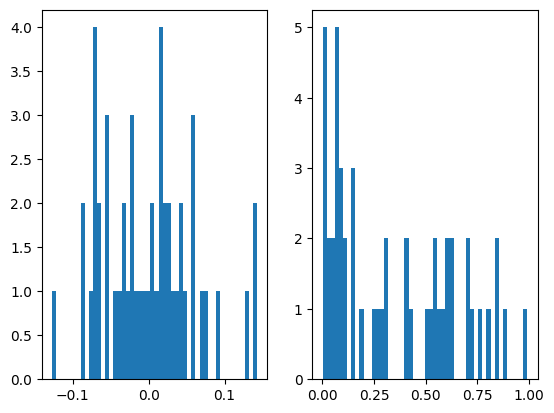

In [6]:
meandiffs,pvals=test(o[0], args, condition='z', plot=False)
fig,ax=plt.subplots(ncols=2)

n_rounds = args.num_applicants / args.applicants_per_round
n_rounds = int(n_rounds/2)
ax[0].hist(meandiffs, bins=n_rounds)
ax[1].hist(pvals,bins=n_rounds)

In [63]:
def _run(seed, num_applicants, applicants_per_round, stream):
    row = {}
    for no_protocol in (True, False):
        cmd = f'--n-cores 1 --num-repeat 1 --num-applicants {num_applicants} --applicants-per-round {applicants_per_round} --fixed-effort-conversion --scaled-duplicates sequence --b-bias 2 --num-envs 2 --pref uniform --test-run --generate 1'
        if no_protocol:
            cmd = f'{cmd} --no-protocol'
        if stream:
            cmd = f'{cmd} --stream'
        args = script.get_args(cmd)
        np.random.seed(seed)
        b, x, y, EW, theta, w, z, y_hat, adv_idx, disadv_idx, o, theta_star, pref_vect  = script.generate_data(
            args.num_applicants, args.admit_all, args.applicants_per_round, args.fixed_effort_conversion, args
            )

        # considering only the first env.
        env_idx = 0 
        y_env = y[env_idx].flatten() 
        theta_env = theta[env_idx]
        z_env = z==env_idx+1
        
        # final data point for as a function on a range of students/ 
        if args.stream:
            upp_limits = [x for x in range(applicants_per_round*2, num_applicants+1, applicants_per_round)]
        else:
            upp_limits = [num_applicants]
        
        err_list = [None] * len(upp_limits)
        for i, t in tqdm.tqdm(enumerate(upp_limits)):
            # limiting to currently "total students"
            x_round = x[:t]
            y_env_round = y_env[:t]
            z_env_round = z_env[:t]
            theta_env_round = theta_env[:t]

            # picking out only the selected student
            y_env_round_selected = y_env_round[z_env_round]
            # print(x_round.shape, y_env_round.shape, z_env_round.shape, theta_env_round.shape, y_env_round_selected, z_env_round.sum() )

            est = script.our2(x_round, y_env_round_selected, theta_env_round, z_env_round)
            assert theta_star[0].shape == est.shape, f"{theta[0].shape}, {est.shape}"
            err_list[i] = np.linalg.norm(theta_star[0] - est )

        row['no-protocol' if no_protocol else 'protocol'] = err_list
    return row


In [70]:
_dfs = []

for apr in tqdm.tqdm((100, 250, 500, 1000)):
    n_runs = 10
    stream = False
    args_list = [(s, 100000, apr, stream) for s in np.arange(n_runs)]
    with Pool(n_runs) as p:
        runs = p.starmap(_run, args_list )

    # adding iteration column
    for run in runs:
        assert len(run['no-protocol'])==  len(run['protocol'])
        iters = np.arange(len(run['no-protocol']))
        run['iters'] = iters

    # create dataframe for this apr.
    dfs = []
    for run in runs:
        df = pd.DataFrame(run)
        dfs.append(df)
    df = pd.concat(dfs)
    df['apr'] = apr
    df

    # combine with rest of the dfs
    _dfs.append(df)
df = pd.concat(_dfs)
df 

  0%|          | 0/4 [00:00<?, ?it/s]

,no-protocol,protocol,iters,apr
0,0.004933,0.063293,0,100
0,0.019787,0.039627,0,100
0,0.007325,0.055180,0,100
0,0.006776,0.054059,0,100
0,0.000328,0.053710,0,100
0,0.003787,0.030500,0,100
0,0.003788,0.056997,0,100
0,0.011098,0.060989,0,100
0,0.003013,0.043704,0,100
0,0.007480,0.055414,0,100


In [71]:
df = pd.melt(
    df, id_vars=('iters', 'apr'), value_vars=('no-protocol', 'protocol'), var_name='method', value_name='error'
)


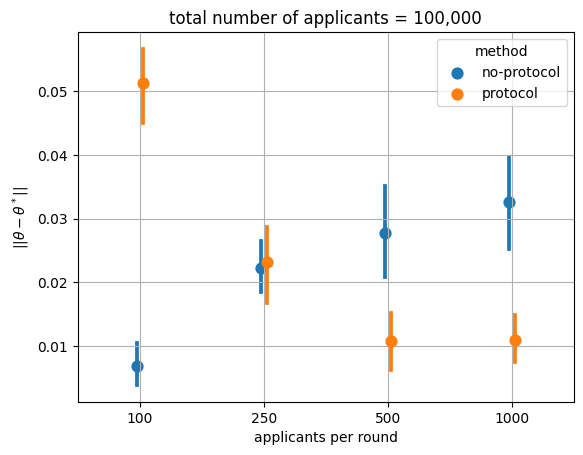

In [76]:

fig,ax=plt.subplots()
sns.pointplot(
    data=df, x='apr', y='error', hue='method' ,join=False, dodge=True, ax=ax
)
ax.set_xlabel('applicants per round')
ax.set_ylabel(r'$|| \theta - \theta^*|| $')
ax.grid() 

ax.set_title('total number of applicants = 100,000')
plt.savefig('figures/apr.pdf')